<a href="https://colab.research.google.com/github/Leonel-H29/Metodos-Numericos-II/blob/master/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PUNTO 1

In [3]:
x=[0,5,10,15,20,25]
v=[0,9.85,14.32,17.63,19.34,22.41]

n=len(x) #Cantidad de puntos
x_cuadrado=[n**2 for n in x] #Elevo al cuadrado los elementos de x
y=[n**2 for n in v] #Elevo al cuadrado los elementos de v
xy=[x*y for x,y in zip(x,y)] #Multiplico cada elemento entre x e y

#print(x_cuadrado)
#print(y)
#print(xy)

sumatoria_x=sum(x)
sumatoria_y=sum(y)
sumatoria_xy=sum(xy)
sumatoria_x_cuadrado=sum(x_cuadrado)
print(f"sx:{sumatoria_x} - sy:{sumatoria_y} - sxy:{sumatoria_xy} - sx^2:{sumatoria_x_cuadrado}")

#a0=(sumatoria_x_cuadrado*sumatoria_y - sumatoria_xy*sumatoria_x)
#a0 /= (n*sumatoria_x_cuadrado - sumatoria_x**2)
a0 = 0
a1=(n*sumatoria_xy - sumatoria_x*sumatoria_y)
a1 /= (n*sumatoria_x_cuadrado - sumatoria_x**2)

print(f"a0: {a0} - a1: {a1} => F(x)= {a1}x+{a0}")
print(f"a1=2g => g: {a1/2}")


sx:75 - sy:1489.1455 - sxy:27233.904499999997 - sx^2:1375
a0: 0 - a1: 19.70191028571427 => F(x)= 19.70191028571427x+0
a1=2g => g: 9.850955142857135


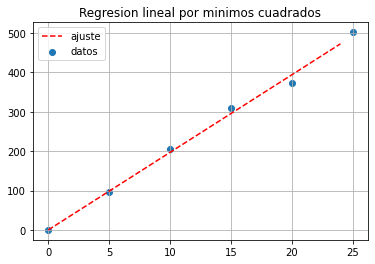

In [ ]:
from matplotlib import pyplot
from numpy import arange
import numpy as np

#y=a1x+a0
def reg_lineal(x,a0,a1):
  return a1*x+a0

def coef_correlacion(sr,st):
  r_cuad=1-(sr-st)
  r=np.sqrt(r_cuad)
  return r


pyplot.scatter(x, y)
# Defino una secuencia de entradas entre las entradas mas pequeñas y grandes conocidas
x_line = arange(min(x), max(x), 1)
#Calculo la salida para el rango
y_line = reg_lineal(x_line, a0, a1)

pyplot.title("Regresion lineal por minimos cuadrados")
#Creo una linea plot para la funcion de mapeo
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.legend(('ajuste','datos'), loc='upper left')
pyplot.grid()
pyplot.show()

#PUNTO 2

In [27]:
import csv
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import io
from datetime import datetime, timedelta

url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'

data = pd.read_csv(url, index_col=None) 

casos_covid = pd.read_csv(url, sep=",", header=0) 
usa = casos_covid.loc[casos_covid['Country/Region'] == 'US']
data_USA =  usa[usa.columns[4:622]].to_numpy()[0]
print(data_USA)


inicio = datetime(2020,1,22)
fin = datetime(2021,9,30)

lista_fechas = [
    (inicio + timedelta(days=d)).strftime("%Y-%m-%d")
     for d in range((fin - inicio).days + 1)
]
#print(len(lista_fechas)) 


[       1        1        2        2        5        5        5        6
        6        8        8        8       11       11       11       12
       12       12       12       12       13       13       14       14
       14       14       14       14       14       14       16       16
       16       16       16       16       17       17       25       32
       55       74      107      184      237      403      519      594
      782     1147     1586     2219     2978     3212     4679     6512
     9169    13663    20030    26025    34944    46096    56714    68841
    86662   105253   127417   143544   165698   192079   224281   256626
   288993   321379   350713   382646   413222   444341   480413   514690
   543878   570812   597803   626217   652179   682442   715446   743379
   769251   799039   825257   854328   887581   919920   950298   976871
  1000666  1025354  1051785  1080942  1115844  1143248  1167577  1191815
  1216263  1240643  1268262  1295396  1320096  1339

In [28]:
def casos_dia_usa(data):
  j=1
  casos=[]
  primero = data[0]
  segundo = data[1]
  casos.append(primero)
  
  for i in range(len(data)-1):
    casos.append(segundo-primero)
    primero=segundo
    
    if j < len(data):
      j=i+1
      segundo=data[j]
  
  return casos

casosUSA=casos_dia_usa(data_USA)
print(casosUSA)
    


[1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 8, 7, 23, 19, 33, 77, 53, 166, 116, 75, 188, 365, 439, 633, 759, 234, 1467, 1833, 2657, 4494, 6367, 5995, 8919, 11152, 10618, 12127, 17821, 18591, 22164, 16127, 22154, 26381, 32202, 32345, 32367, 32386, 29334, 31933, 30576, 31119, 36072, 34277, 29188, 26934, 26991, 28414, 25962, 30263, 33004, 27933, 25872, 29788, 26218, 29071, 33253, 32339, 30378, 26573, 23795, 24688, 26431, 29157, 34902, 27404, 24329, 24238, 24448, 24380, 27619, 27134, 24700, 19014, 19139, 22887, 20516, 26736, 24697, 24285, 18639, 22214, 20919, 22795, 25787, 23659, 21120, 20306, 18489, 18984, 19474, 21723, 24648, 24213, 19334, 17005, 21269, 19780, 21735, 24912, 21474, 18268, 16698, 18008, 21196, 22402, 25149, 25126, 19331, 18583, 23901, 27215, 28401, 31685, 32534, 26067, 31156, 37266, 36212, 40260, 46319, 41698, 41796, 39700, 48369, 51566, 56370, 52617, 48355, 50804, 42734, 59128, 59645, 60953, 67801, 

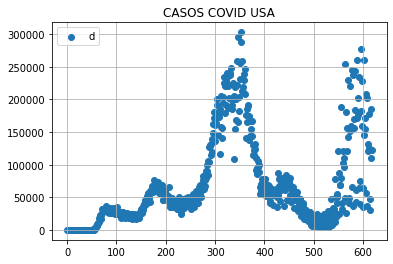

In [14]:
from scipy import optimize
import random
import matplotlib.pyplot as plt

def lineal(x,a,b):
  return a*x+b

def cuadratica(x,a,b,c):
  return a + b*x + c*x**2

def exponencial(x, a, b, c):
  return a * np.exp(-b * x) + c

def logaritmica(x,a,b, c):
  return a * np.log(b * x) + c

def St(yReal):
  promedio = np.mean(yReal)
  sum = np.sum((yReal-promedio)**2)
  return sum

def Sr(yReal, yAprox):
  sum = np.sum((yReal-yAprox)**2)
  return sum

def CoefCorrelacion(Sr, St):
  r_cuad = 1 - (Sr/St)
  r= np.sqrt(r_cuad)
  return r


y = casosUSA
x = np.arange(len(y))


plt.scatter(x,y)
plt.title('CASOS COVID USA')
plt.legend(('datos'), loc='upper left')
plt.grid()
plt.show()


# **CON LA GRAFICA COMPLETA**

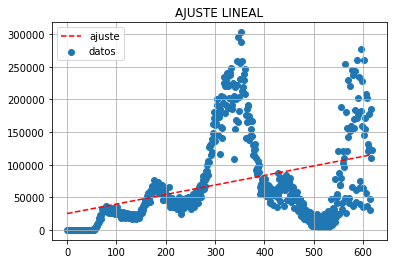

r: 0.3844931966321833


In [29]:
y = casosUSA
x = np.arange(len(y))


a,b = optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()

print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

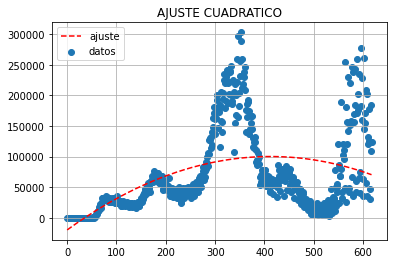

r: 0.4856254241937988


In [30]:
y = casosUSA
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


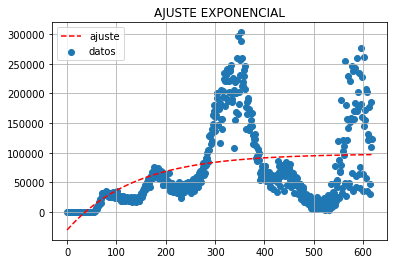

r: 0.47550044273719677


In [31]:
y = casosUSA
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


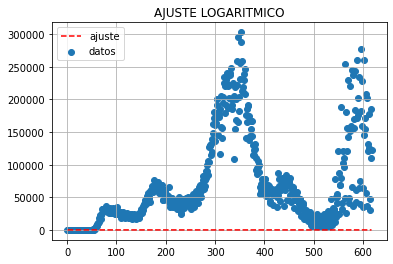

r: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


In [32]:
y = casosUSA
x = np.arange(len(y))


a,b= optimize.curve_fit(logaritmica,x,y)
#print(a)

plt.plot(x,logaritmica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LOGARITMICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()

print(f"r: {CoefCorrelacion(Sr(y,logaritmica(x,*a)),St(y))}")

##AJUSTO POR PARTES

# **PRIMEROS 75 DIAS**


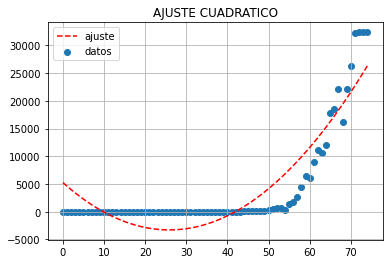

r: 0.9137696841265316


In [33]:
y = casosUSA[0:75]
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

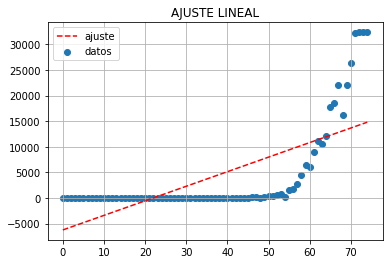

r: 0.6897907393086034


In [34]:
y = casosUSA[0:75]
x = np.arange(len(y))


a,b= optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

In [35]:
y = casosUSA[0:75]
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


RuntimeError: ignored

# **75-200 DIAS**


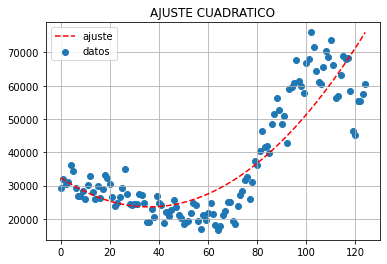

r: 0.873923396190269


In [36]:
y = casosUSA[75:200]
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

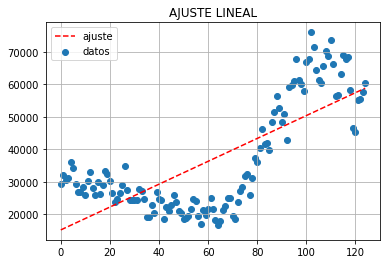

r: 0.7428962683491284


In [37]:
y = casosUSA[75:200]
x = np.arange(len(y))


a,b= optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


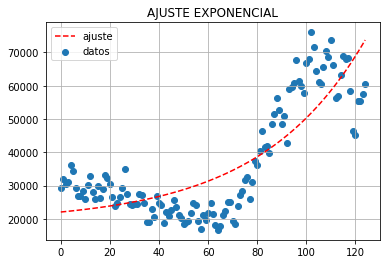

r: 0.8296199172197418


In [38]:
y = casosUSA[75:200]
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


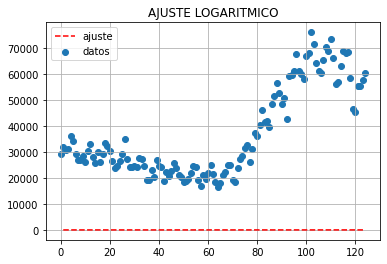

r: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


In [39]:
y = casosUSA[75:200]
x = np.arange(len(y))


a,b= optimize.curve_fit(logaritmica,x,y)
#print(a)

plt.plot(x,logaritmica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LOGARITMICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,logaritmica(x,*a)),St(y))}")

# **200-350 DIAS**

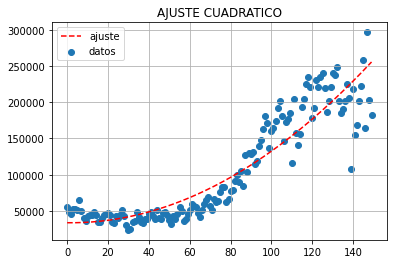

r: 0.9214366301925533


In [40]:
y = casosUSA[200:350]
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

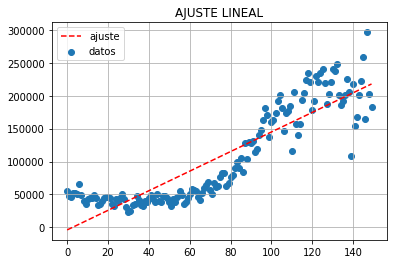

r: 0.8904688459748796


In [41]:
y = casosUSA[200:350]
x = np.arange(len(y))


a,b= optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


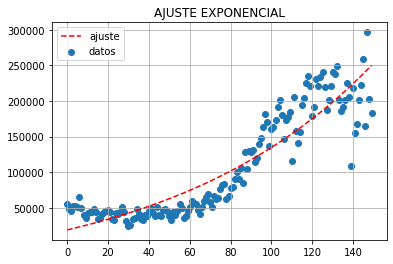

r: 0.9131831649113041


In [42]:
y = casosUSA[200:350]
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

# **350-500 DIAS**

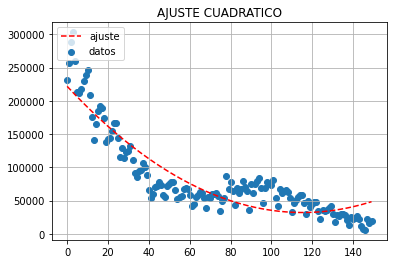

r: 0.9059295966377496


In [43]:
y = casosUSA[350:500]
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

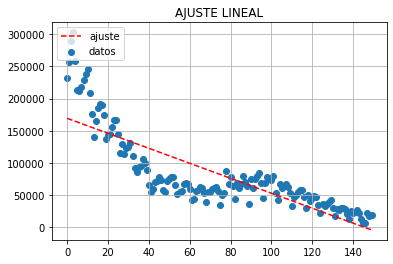

r: 0.8182608461998533


In [44]:
y = casosUSA[350:500]
x = np.arange(len(y))


a,b= optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

In [45]:
y = casosUSA[350:500]
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


RuntimeError: ignored

# **500 HASTA EL FINAL**


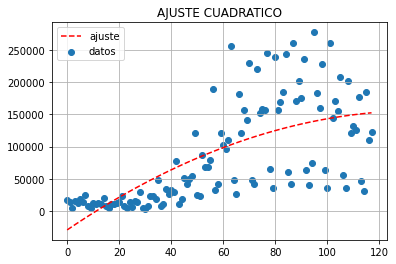

r: 0.6847887182251434


In [46]:
y = casosUSA[500:]
x = np.arange(len(y))


a,b= optimize.curve_fit(cuadratica,x,y)
#print(a)

plt.plot(x,cuadratica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE CUADRATICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,cuadratica(x,*a)),St(y))}")

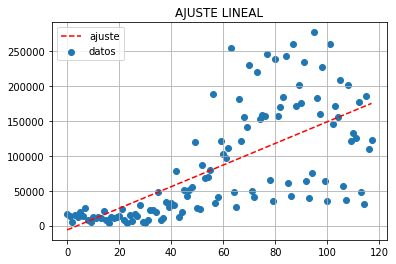

r: 0.6717551162851952


In [47]:
y = casosUSA[500:]
x = np.arange(len(y))


a,b= optimize.curve_fit(lineal,x,y)
#print(a)

plt.plot(x,lineal(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LINEAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,lineal(x,*a)),St(y))}")

In [26]:
y = casosUSA[500:]
x = np.arange(len(y))


a,b= optimize.curve_fit(exponencial,x,y)
#print(a)

plt.plot(x,exponencial(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE EXPONENCIAL')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,exponencial(x,*a)),St(y))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


RuntimeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


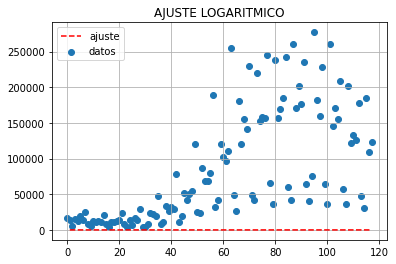

r: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


In [48]:
y = casosUSA[500:]
x = np.arange(len(y))


a,b= optimize.curve_fit(logaritmica,x,y)
#print(a)

plt.plot(x,logaritmica(x,*a), '--', color='red')
plt.scatter(x,y)
plt.title('AJUSTE LOGARITMICO')
plt.legend(('ajuste','datos'), loc='upper left')
plt.grid()
plt.show()
print(f"r: {CoefCorrelacion(Sr(y,logaritmica(x,*a)),St(y))}")